In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pandas_datareader.data as web
import scipy

In [3]:
#dataread

AAPL_df = pd.read_csv('fintech_quiz_1/AAPL_n.csv')
WMT_df = pd.read_csv('fintech_quiz_1/WMT_n.csv')
OTM_df = pd.read_csv('fintech_quiz_1/OptionDataOTM_data.csv')

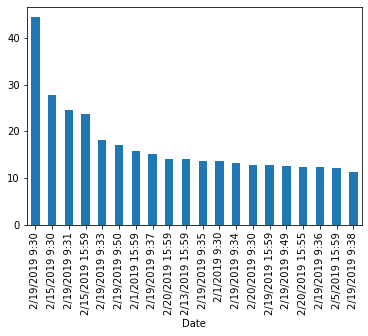

First Column NSVA : 
[[1.97604231]
 [0.49226902]
 [0.76816056]
 ...
 [2.99311167]
 [3.81505074]
 [4.88729746]]


In [64]:
def do(data):

    AAPL = data
    AAPL = data.drop('Date',axis=1)
    from sklearn.preprocessing import StandardScaler
    AAPL = StandardScaler().fit_transform(AAPL)
    U, s, Vh = scipy.linalg.svd((AAPL), full_matrices=False)
    U.shape, s.shape, Vh.shape
    X = np.dot (abs(U) , np.diag(s))
    np.shape(X)
    x = (X[:, [0]])
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = AAPL_df.Date)
    newData_df.head(1)
    df = pd.DataFrame(data = X,columns = c)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    return x, X, Vh
    
    
x, X, Vh = do(WMT_df)   

print ("First Column NSVA : ")
print(x)

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def doPCA(data):

  norm = StandardScaler().fit_transform(data)
  pca = PCA()
  newdata = pca.fit_transform(norm)
  return newdata,pca


In [78]:
def imp(data, n,pca) :

    #data = data.drop('Date',axis=1)
    
    PC = pca
    PC_df = pd.DataFrame(data=PC, index = data.columns)
    PC_dim = PC_df
    
    weight = sum(pca)
    print(weight)
    
    
    
    return PC_dim
    
PC_dim = imp(OTM_df, X, Vh)
PC_dim

[ 0.47221625  1.95870084  0.61538833  0.19687821  0.66317051 -0.98735566
  0.9996838  -1.59322118 -0.68761224  0.31279493]


,0,1,2,3,4,5,6,7,8,9
Option_type,-0.002937,0.483095,0.469360,0.466214,0.331325,0.341019,0.019587,-0.005729,0.260065,-0.186643
Ask,0.065834,0.236251,0.261356,0.218551,-0.516519,-0.548543,0.081668,-0.084225,0.329935,0.365333
Bid,-0.055782,-0.003786,-0.090959,0.011206,0.213880,0.192760,0.788478,-0.089222,-0.061760,0.521633
Option_price,0.884346,-0.011439,-0.023201,-0.029372,0.238867,-0.022134,-0.148976,-0.328685,-0.025515,0.167256
Stock_price,-0.323194,-0.038637,-0.040207,-0.032588,-0.036706,0.054361,-0.055944,-0.930260,0.078308,-0.111471
Strike_price,-0.128005,0.211208,0.236316,0.171462,-0.053581,0.010530,-0.264000,-0.070552,-0.815237,0.333907
Volatility,0.232206,0.040835,0.049139,0.165240,-0.239026,-0.202626,0.513750,-0.079980,-0.382288,-0.632474
Volume,-0.003298,0.349181,0.434595,-0.816446,0.059576,-0.062049,0.102687,-0.009461,-0.018541,-0.065026
Time_to_maturity,-0.188788,-0.042292,-0.007380,0.087016,0.675008,-0.703537,0.004030,-0.000649,-0.040941,-0.051488
Implied_volatility,-0.008166,0.734285,-0.673631,-0.044404,-0.009653,-0.047136,-0.041595,0.005542,-0.011637,-0.028233


In [75]:
OTM_df.head(10)

,Option_type,Ask,Bid,Option_price,Stock_price,Strike_price,Volatility,Volume,Time_to_maturity,Implied_volatility
0,1,0.20,0.00,0.09,79.54,45.0,0.286563,4,0.123288,0.763674
1,1,0.15,0.00,0.10,72.10,50.0,0.396490,1,0.095890,0.578129
2,1,0.30,0.00,0.05,82.05,55.0,0.273101,2,0.117808,0.568364
3,1,0.35,0.20,0.31,70.55,60.0,0.372803,2,0.082192,0.421881
4,1,0.90,0.70,0.85,70.55,65.0,0.372803,16,0.082192,0.363043
5,1,2.45,2.15,2.32,70.55,70.0,0.372803,25,0.082192,0.332526
6,1,2.05,1.70,1.92,70.55,65.0,0.351225,2,0.156164,0.392828
7,1,3.20,2.75,2.90,72.54,70.0,0.354231,11,0.161644,0.307868
8,1,0.15,0.05,0.17,70.55,35.0,0.311515,24,0.331507,0.572270
9,1,0.15,0.05,0.60,79.40,40.0,0.250408,3,0.378082,0.503911


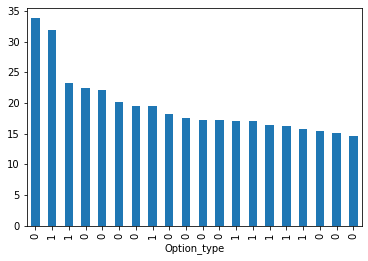

First Column NSVA : 
[[1.32435986]
 [1.16427415]
 [1.02307018]
 ...
 [1.07593169]
 [0.62535431]
 [1.02889632]]


In [77]:
def do(data):

    AAPL = data
    #AAPL = data.drop('Option_type',axis=1)
    from sklearn.preprocessing import StandardScaler
    AAPL = StandardScaler().fit_transform(AAPL)
    U, s, Vh = scipy.linalg.svd((AAPL), full_matrices=False)
    U.shape, s.shape, Vh.shape
    X = np.dot (abs(U) , np.diag(s))
    np.shape(X)
    x = (X[:, [0]])
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = data.Option_type)
    newData_df.head(1)
    df = pd.DataFrame(data = X,columns = c)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    return x, X, Vh
    
    
x, X, Vh = do(OTM_df)   

print ("First Column NSVA : ")
print(x)

(5850, 1)